In [1]:
from sklearn import svm

In [14]:
X = [[2, 0], [1, 1], [2,3]]
y = [0, 0, 1]
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# print(clf)

# get support vectors
print(clf.support_vectors_)

# get number of support vectors for each class
print(clf.support_) 


[[ 1.  1.]
 [ 2.  3.]]
[1 2]


Automatically created module for IPython interactive environment
w:  [ 0.90230696  0.64821811]
a:  -1.39198047626
support_vectors_:  [[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
clf.coef_:  [[ 0.90230696  0.64821811]]


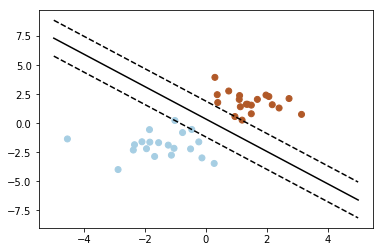

In [31]:
print(__doc__)
import numpy as np
import pylab as pl
from sklearn import svm

# we create 40 separable points
np.random.seed(0) #随机函数的种子
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


print ("w: ", w)
print ("a: ", a)
# print " xx: ", xx
# print " yy: ", yy
print ("support_vectors_: ", clf.support_vectors_)
print ("clf.coef_: ", clf.coef_)

# In scikit-learn coef_ attribute holds the vectors of the separating hyperplanes for linear models. It has shape (n_classes, n_features) if n_classes > 1 (multi-class one-vs-all) and (1, n_features) for binary classification.
# 
# In this toy binary classification example, n_features == 2, hence w = coef_[0] is the vector orthogonal to the hyperplane (the hyperplane is fully defined by it + the intercept).
# 
# To plot this hyperplane in the 2D case (any hyperplane of a 2D plane is a 1D line), we want to find a f as in y = f(x) = a.x + b. In this case a is the slope of the line and can be computed by a = -w[0] / w[1].


# plot the line, the points, and the nearest vectors to the plane
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()